# Parallel Processing with Dask (MACS 30200)
### by [Richard W. Evans](https://sites.google.com/site/rickecon/), April 2018
The code in this Jupyter notebook was written using Python 3.6.

Parallel processing and high performance computing have become essential tools with the increase in the size and complexity of datasets and with the advances in dimensionality and solution algorithms of mathematical models. Further, simulation methods and statistical learning training methods benefit from the ability to scale computations on distributed systems like Google Cloud Services (GCS), Amazon Web Services (AWS), and Microsoft Azure.

The standard laptop has multiple processors and usually comes equipped with a graphics card with hundreds of graphics processing units (GPUs). Each student's laptop can be transformed into a distributed computing system or, in other words, a supercomputer. Further, University of Chicago students have access to the [Midway cluster](https://rcc.uchicago.edu/resources/high-performance-computing) hosted by the [Research Computing Center (RCC)](https://rcc.uchicago.edu/). And finally, University of Chicago students with very sophisticated and high profile projects can apply for allocations on the [Argonne National Laboratory](https://www.anl.gov/) supercomputer, which is the [eighth most powerful](https://en.wikipedia.org/wiki/TOP500) in the world as of November 2017.

## 1. Reasons we need HPC

* Large data must be stored across multiple hard drives
* Large data I/O must be optimized
* Many technical computations can be parallelized
* Simulation methods can be parallelized
* Sampling methods can be parallelized

Previous thinking was that we could just wait for processors and memory to become powerful enough, compact enough, and efficient enough to accomodate our increasing data sizes and methods complexity. However, the steady-increases in processor efficiency began to plateau in the mid 2000s. The March 12, 2016 issue of *The Economist* had an article entitled "After Moore's Law" that provided the following graphic of the trailing off of individual processor power.

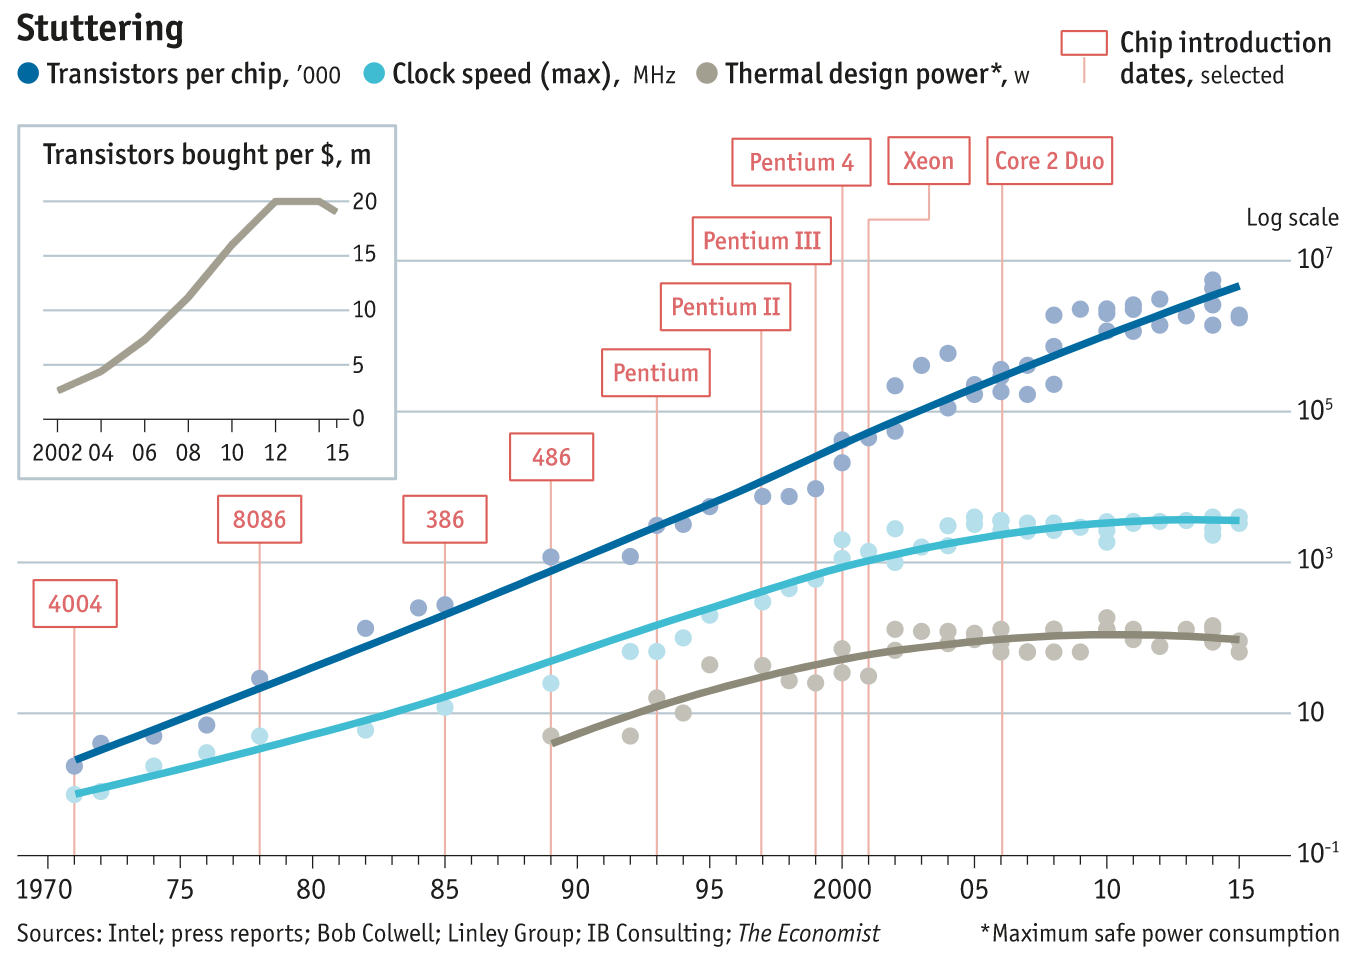

Maximum clock speed has slowed despite the steady (exponential) increase in transistors per chip. The reasons for this slowdown are the following.

* Hitting heat limits, cannot dissipate processing heat fast enough
* Current leakage
* Power consumption too high
* Memory requirements too high

But note that the price per transistor has also plateaued. The solution to this problem has been more parallel architecture and distributed systems as well as more specific architecture tailored to specific problems.

## 2. Serial versus Parallel
Serial computation is a set of instructions for which the order of computational instructions is important. Serial instruction tasks cannot be parallelized. Examples of computational tasks that must be serial are recursions and sorting.

![Serial Process](images/SerialProcess.png "Serial Process")

A parallel process breaks a problem up into pieces, executes the instructions associated with each piece, then brings the answers back together. Examples of computational tasks that can be parallelized are simulation, bootstrapping, some for-loops, pieces of numerical methods.

![Parallel Process](images/ParallelProcess.png "Parallel Process")

## 3. Low-level to high-level parallel programming paradigms
[Message passing interface (MPI)](https://en.wikipedia.org/wiki/Message_Passing_Interface) and OpenMP (open multi-processing) are the two main paradigms for performing high performance computing and parallel operations. These platforms are built on C, C++, and Fortran code, and are difficult to learn and to program. Most modern computer languages have bindings for these two platforms that allow users to access the functionality of MPI and OpenMP from the native environment of their high-level language of choice (e.g., Python, R, Java).

Python has a particularly powerful library for parallel data I/O and parallel computation called [Dask](https://dask.pydata.org/en/latest/). A large number of great webcast tutorials and Jupyter notebooks for using Dask are available on the web. A particularly valuable [webcast Dask tutorial](http://localhost:8888/notebooks/parallel.ipynb) came from the SciPy 2017 meeting in Austin Texas. All of the Jupyter notebooks from that session are available in the [https://github.com/dask/dask-tutorial](https://github.com/dask/dask-tutorial) repository. I recommend this tutorial to all researchers interested in learning parallel computation using Python. The following is a summary of the video.

* (0:00-21:48) James Crist: Using Dask delayed
* (21:53-56:59) Skipper Seabold: Dask DataFrames
  * Dask DataFrames do not handle multiple pandas indices. Just choose the one that is the most intensive, and then choose subroutines to use any secondary indices
  * Don't distribute stuff that will fit in memory. Don't add more complexity when not needed
* (57:00-1:34:03) Martin Durant: Dask arrays (NumPy)
  * Divides arrays into chunks that vary across all dimensions
  * Dask DataFrames divides Pandas DataFrames into separate similar DataFrame chunks.
  * Uses hdf5 data
  * You want each piece of memory to be multiple megabytes but less than a gigabyte
* (1:34:05-1:49:30) Skipper Seabold: Bag (parallel lists for semi-structured data)
  * Good place to clean large data, messy data, nested data, transactional data
  * Use foldby instead of groupby with bags
* (1:49:30-2:06:28) James Crist: Schedulers
  * Multiprocessing scheduler has some flaws
  * Distributed scheduler fixes this
  * Dask functionality with GPU's is a little limited
* (2:06:37-2:20:58) Martin Durant: Distributed efficiency and DataFrames
  * On distributed systems, want to store separate pandas dataframes in memory on multiple machines.
  * Use the .persist method
* (2:21:04-2:30:33) James Crist: Advanced distributed features
  * Has functions like gather for asyncronous computations
* (2:31:00-2:37:14) James Crist: History and progress of Dask, final Q&A

## 4. Using Dask delayed
Use Dask tutorial notebook [02_foundations.ipynb](https://github.com/dask/dask-tutorial/blob/master/02_foundations.ipynb). You will need to follow the instructions in the [README.md](https://github.com/dask/dask-tutorial/blob/master/README.md) on the [Dask tutorial page](https://github.com/dask/dask-tutorial) in order to be able to access the corresponding datasets and execute the cell blocks. Note that the `python prep.py` step takes a few minutes because it is creating a bunch of large data sets.

## 5. Using Dask DataFrames (Pandas)
Use Dask tutorial notebook [07_dataframe.ipynb](https://github.com/dask/dask-tutorial/blob/master/07_dataframe.ipynb).

 ## 6. Using Dask arrays (NumPy)
 Use Dask tutorial notebook [05_array.ipynb](https://github.com/dask/dask-tutorial/blob/master/05_array.ipynb). This tutorial uses the HDF5 data format. [HDF5](https://www.hdfgroup.org/solutions/hdf5/) stands for hierarchical data format, and is a popular and efficient format in which to store large *n*-dimensional data or *n*-dimensional arrays. HDF5 files have a nice interface with both native python (`h5py` library) and through `Dask`.

For working with HDF5 files in `Python`, you can go to the [`h5py` users manual](http://docs.h5py.org/en/latest/) or [FAQ](http://docs.h5py.org/en/latest/faq.html) page. Or you can go to the nice O'Reilley book by Collette (2013).

## 7. More complicated parallelism
You can imagine much more complicated graphs of parallel processes. `Dask` allows you to perform more customized computation of parallel graphs in which you control what processes get sent to which workers.

Use `Dask` tutorial notebook [04_distributed.ipynb](http://localhost:8889/notebooks/dask-tutorial/04_distributed.ipynb).

### 7.1. Example
Lets do a serial example and a parallel example in which we draw 10 datasets of 1 million elements each from a . From each of these datasets, we will compute the mean, standard deviation, and 90th percentile. In serial that is done by the following code.

In [ ]:
import numpy as np
import scipy.stats as sts
import timeit

Sims = 10
ObsPerSim = 1000000
mu_norm = 10
std_norm = 1.8
seed_vec = np.arange(1, 11)

start_time = timeit.default_timer()

results_ser = np.zeros([Sims, 3])

for sim in range(Sims):
    data = sts.lognorm.rvs(s=1.0, loc=std_norm, scale=np.exp(mu_norm),
                           size=ObsPerSim, random_state=seed_vec[sim])
    results_ser[sim, 0] = data.mean()
    results_ser[sim, 1] = data.std()
    results_ser[sim, 2] = sorted(data)[900000]

elapsed_time = timeit.default_timer() - start_time
print('Elapsed time=', elapsed_time, 'seconds')
    
print(results_ser)

In parallel, we can do that with the following code. We write a function that takes that parameters necessary for each of the 10 simulations, we start up the distributed scheduluer, we define the function as a `Dask.delayed` object, then we compute it using `Dask.compute`.

In [ ]:
from dask.distributed import Client
from dask import compute, delayed
import dask.multiprocessing

start_time = timeit.default_timer()

def sim_stats(sim_val, std, mu, obs, seed):
    data = sts.lognorm.rvs(s=1.0, loc=std, scale=np.exp(mu), size=obs,
                           random_state=seed)
    results_mean = data.mean()
    results_std = data.std()
    results_90pct = sorted(data)[int(0.9 * obs)]
    results = np.array([results_mean, results_std, results_90pct])
    
    return results

lazy_values = []
for sim in range(Sims):
    lazy_values.append(delayed(sim_stats)(sim, std_norm, mu_norm, ObsPerSim, seed_vec[sim]))

results_par = compute(*lazy_values, get=dask.multiprocessing.get, num_workers=3)

elapsed_time = timeit.default_timer() - start_time
print('Elapsed time=', elapsed_time, 'seconds')

print(results_par)

## 8. References
* Collette, Andrew, *Python and HDF5*, O'Reilly (2013).
* *The Economist*, "[After Moore's Law](https://www.economist.com/technology-quarterly/2016-03-12/after-moores-law)", *The Economist*, (March 12, 2016).